In [1]:
import glacierml as gl
from tqdm import tqdm
import scipy.stats as st
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance
pd.set_option('display.max_columns', None)

2024-04-22 21:42:14.995336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-22 21:42:14.995360: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
home_path = '/path/to/project/directory'
[
        data_path, RGI_path, glathida_path, 
        coregistration_testing_path, 
        arch_test_path, LOO_path
] = gl.set_paths(home_path)

In [3]:
#### normalize data for plotting ####
norm = False

def normx(x, norm = True):
    if norm == False:
        z = x
    elif norm == True:
        z = (x - np.min(x)) / (np.max(x) - np.min(x)) * 100
    return z

In [6]:
cols, train = gl.load_LOO_data(home_path,include_train = True)
cols, df = gl.load_LOO_data(home_path,include_train = False)

train = train.sort_values('Thickness', ascending = True)

In [7]:
cols = train.index.tolist()

In [10]:
train[cols].T

,223,216,238,78,92,229,243,162,239,110,29,125,48,153,227,109,235,183,57,272,257,64,25,190,196,96,21,61,89,136,269,192,118,242,140,11,7,206,82,270,15,258,189,173,154,265,120,45,267,268,137,247,208,80,144,0,264,94,245,24,271,55,12,33,212,9,79,266,119,10,59,256,181,194,54,41,99,104,138,20,98,56,250,163,47,84,40,19,50,157,168,42,220,187,49,214,60,31,71,204,186,259,195,177,95,90,8,132,197,152,226,254,112,76,228,51,260,209,88,101,81,106,128,201,28,3,123,232,224,130,107,66,191,141,217,13,30,62,18,219,225,237,170,117,218,127,111,97,85,150,234,142,4,139,87,70,143,193,68,46,116,249,253,175,35,146,174,171,16,102,69,213,37,236,52,211,145,39,262,74,93,147,72,108,207,200,2,215,36,5,83,115,114,180,202,134,251,222,38,149,73,179,255,65,126,58,53,133,124,148,67,199,169,161,1,241,188,23,63,151,155,246,172,230,165,184,91,159,176,122,34,44,182,198,17,231,233,203,135,27,121,86,244,75,164,22,113,185,131,129,103,252,221,205,100,210,178,167,156,158,166,6,263,160,240,14,248,26,77,32,43,261,105
223,32.0,24.0,30.0,27.0,34.0,23.0,34.0,26.0,24.0,25.0,44.0,20.0,28.0,40.0,67.0,29.0,32.0,16.0,47.0,33.0,34.0,24.0,31.0,21.0,27.0,26.0,29.0,24.0,21.0,23.0,21.0,20.0,24.0,41.0,21.0,59.0,35.0,23.0,28.0,28.0,32.0,65.0,27.0,44.0,34.0,25.0,42.0,19.0,26.0,50.0,40.0,21.0,80.0,71.0,42.0,34.0,27.0,30.0,34.0,41.0,39.0,49.0,33.0,36.0,42.0,30.0,62.0,26.0,45.0,69.0,44.0,65.0,36.0,42.0,30.0,28.0,42.0,44.0,44.0,45.0,47.0,51.0,61.0,47.0,38.0,44.0,47.0,48.0,46.0,38.0,45.0,41.0,35.0,46.0,44.0,47.0,38.0,52.0,34.0,49.0,34.0,44.0,48.0,42.0,24.0,32.0,57.0,41.0,43.0,52.0,51.0,55.0,73.0,68.0,41.0,49.0,40.0,47.0,43.0,41.0,46.0,44.0,61.0,41.0,41.0,42.0,45.0,47.0,52.0,52.0,49.0,42.0,80.0,46.0,50.0,49.0,42.0,45.0,40.0,54.0,41.0,53.0,47.0,41.0,44.0,51.0,42.0,72.0,43.0,44.0,44.0,32.0,46.0,48.0,62.0,50.0,45.0,88.0,44.0,39.0,41.0,47.0,51.0,61.0,56.0,38.0,61.0,50.0,31.0,37.0,50.0,54.0,158.0,44.0,53.0,57.0,48.0,62.0,73.0,64.0,56.0,52.0,41.0,44.0,50.0,48.0,48.0,70.0,52.0,54.0,51.0,58.0,56.0,51.0,43.0,56.0,53.0,54.0,52.0,49.0,64.0,49.0,84.0,68.0,49.0,34.0,74.0,41.0,66.0,69.0,54.0,47.0,65.0,54.0,68.0,76.0,63.0,51.0,46.0,53.0,46.0,57.0,115.0,36.0,45.0,72.0,71.0,26.0,114.0,57.0,64.0,73.0,63.0,47.0,53.0,66.0,57.0,56.0,170.0,73.0,104.0,61.0,92.0,145.0,92.0,50.0,49.0,78.0,60.0,79.0,85.0,145.0,78.0,78.0,108.0,71.0,168.0,72.0,62.0,143.0,94.0,127.0,153.0,106.0,124.0,138.0,106.0,186.0,87.0,213.0,276.0,216.0,81.0
216,30.0,27.0,30.0,31.0,35.0,21.0,33.0,25.0,26.0,23.0,45.0,19.0,34.0,43.0,61.0,27.0,30.0,10.0,49.0,30.0,34.0,23.0,28.0,21.0,25.0,22.0,30.0,27.0,20.0,21.0,21.0,21.0,27.0,40.0,18.0,63.0,32.0,23.0,28.0,25.0,32.0,68.0,25.0,43.0,37.0,23.0,43.0,17.0,24.0,50.0,39.0,21.0,80.0,72.0,42.0,31.0,26.0,33.0,38.0,42.0,41.0,44.0,33.0,34.0,45.0,34.0,62.0,24.0,45.0,73.0,48.0,65.0,31.0,36.0,32.0,28.0,43.0,45.0,44.0,45.0,44.0,52.0,61.0,50.0,35.0,47.0,46.0,43.0,41.0,39.0,39.0,40.0,37.0,48.0,45.0,47.0,38.0,53.0,33.0,50.0,38.0,49.0,50.0,42.0,23.0,34.0,55.0,40.0,44.0,53.0,53.0,54.0,72.0,71.0,43.0,51.0,42.0,49.0,45.0,43.0,45.0,45.0,54.0,43.0,40.0,44.0,44.0,46.0,52.0,51.0,49.0,44.0,77.0,47.0,50.0,50.0,43.0,46.0,40.0,53.0,43.0,52.0,50.0,44.0,46.0,51.0,45.0,75.0,40.0,45.0,45.0,31.0,47.0,48.0,56.0,53.0,46.0,88.0,47.0,41.0,43.0,45.0,51.0,59.0,58.0,39.0,63.0,53.0,30.0,39.0,49.0,56.0,157.0,44.0,53.0,59.0,49.0,63.0,73.0,65.0,58.0,53.0,39.0,46.0,54.0,47.0,47.0,72.0,47.0,54.0,54.0,59.0,54.0,51.0,43.0,56.0,57.0,52.0,52.0,52.0,66.0,43.0,86.0,71.0,49.0,36.0,77.0,38.0,63.0,70.0,50.0,50.0,65.0,55.0,69.0,79.0,64.0,51.0,46.0,53.0,44.0,60.0,117.0,36.0,47.0,74.0,74.0,24.0,116.0,57.0,64.0,71.0,63.0,45.0,54.0,65.0,57.0,56.0,166.0,70.0,104.0,61.0,92.0,142.0,87.0,48.0,45.0,78.0,62.0,80.0,86.0,145.0,77.0,71.0,107.0,72.0,167.0,71.0,61.0,144.0,91.0,129.0,152.0,103.0,123.0,127.0,104.0,177.0,84.0,212.0,251.0,214.0,76.0
238,26.0,26.0,30.0,29.0,34.0,20.0,34.0,25.0,26.0,24.0,46.0,17.0,32.0,45.0,61.0,32.0,28.0,12.0,49.0,31.0,34.0,23.0,26.0,23.0,31.0,24.0,36.0,26.0,20.0,22.0,22.0,22.0,26.0,46.0,20.0,62.0,33.0,23.0,27.0,24.0,37.0,67.0,24.0,45.0,36.0,23.0,45.0,

In [13]:
x.min().min()

9.0

Text(0, 0.5, 'Left-Out-Thickness Model')

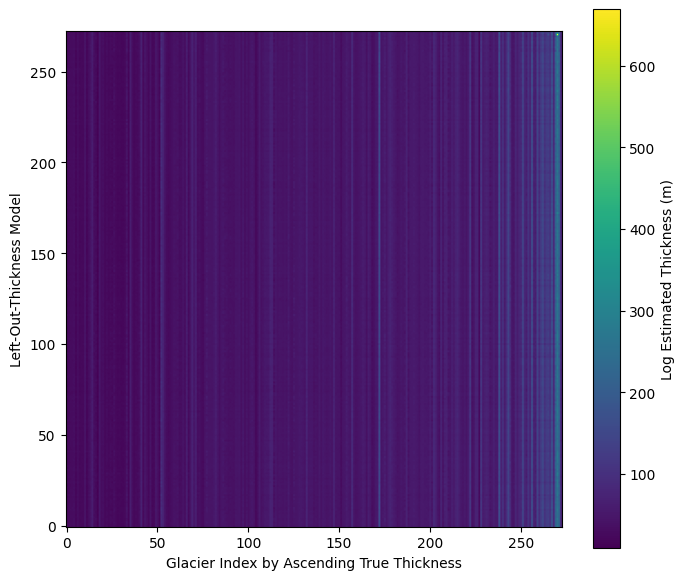

In [14]:
### Visualize the dataset ####

x = ((train[cols].T))
plt.figure(figsize = (8,7))
plt.imshow(
    x, cmap = 'viridis',vmin=x.min().min(),vmax=x.max().max()
)
plt.gca().invert_yaxis()

plt.colorbar(label = 'Estimated Thickness (m)')
plt.xlabel('Glacier Index by Ascending True Thickness')
plt.ylabel('Left-Out-Thickness Model')
# plt.xlabel

Text(0, 0.5, 'Left-Out-Thickness Model')

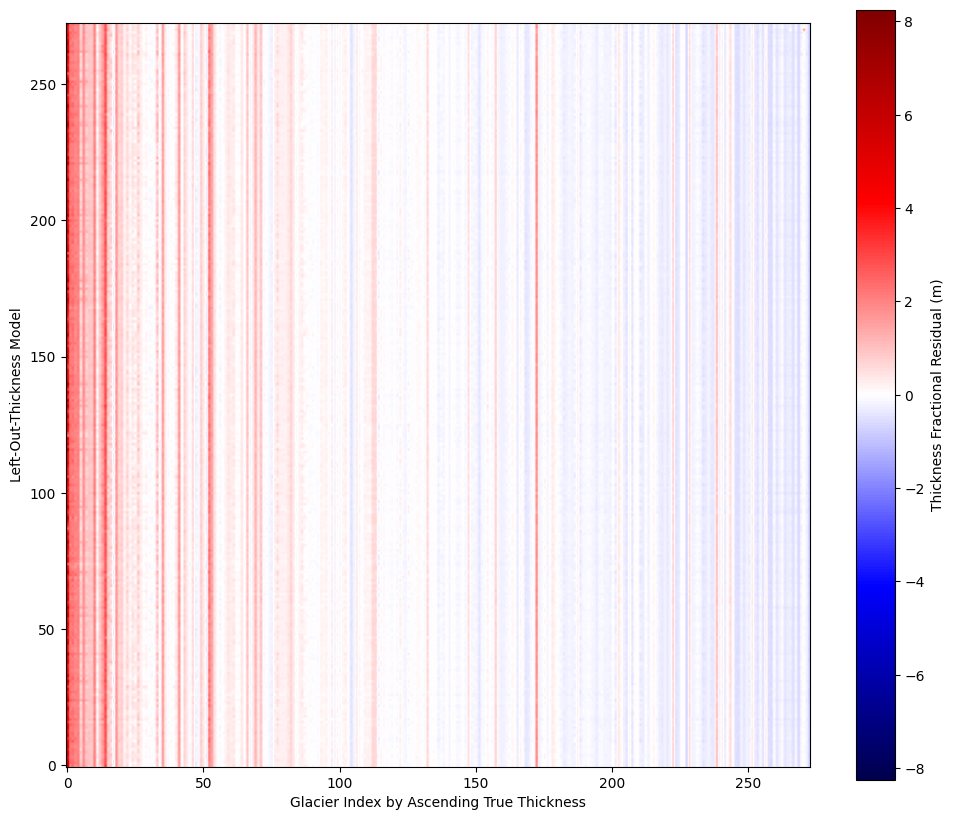

In [18]:
### Visualize the dataset ####
r = (train[cols].T - train['Thickness']) / train['Thickness']
plt.figure(figsize = (12,10))
plt.imshow(
    r, cmap = 'seismic',vmin=-(abs(r).max().max()),vmax=(abs(r).max().max())
)
plt.gca().invert_yaxis()

plt.colorbar(label = 'Thickness Fractional Residual (m)')
plt.xlabel('Glacier Index by Ascending True Thickness')
plt.ylabel('Left-Out-Thickness Model')
# plt.xlabel

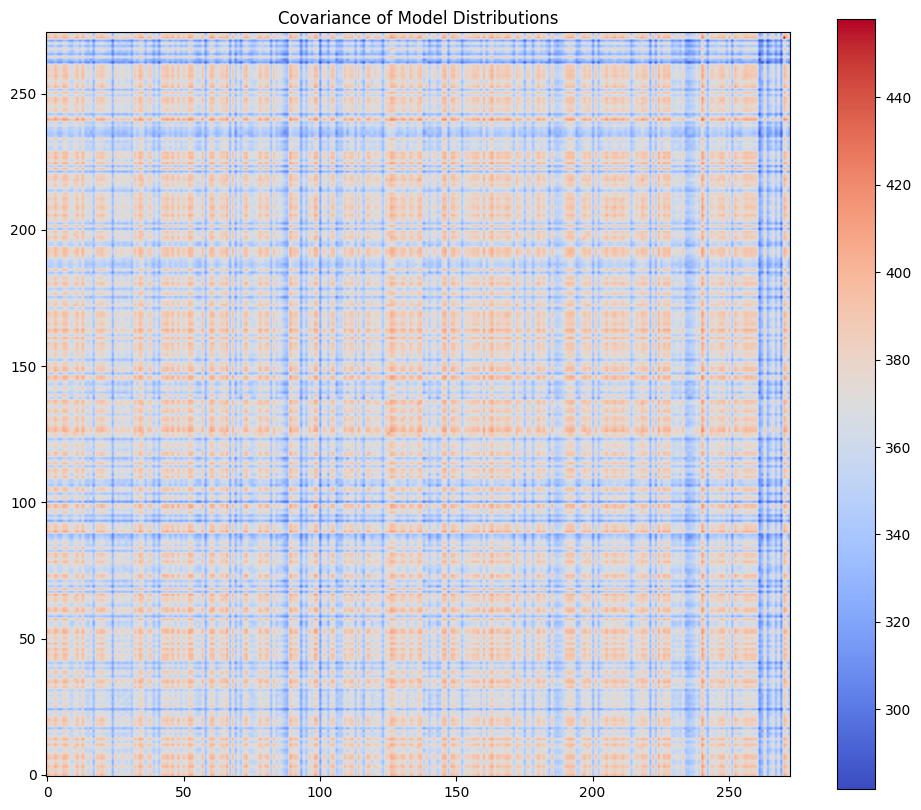

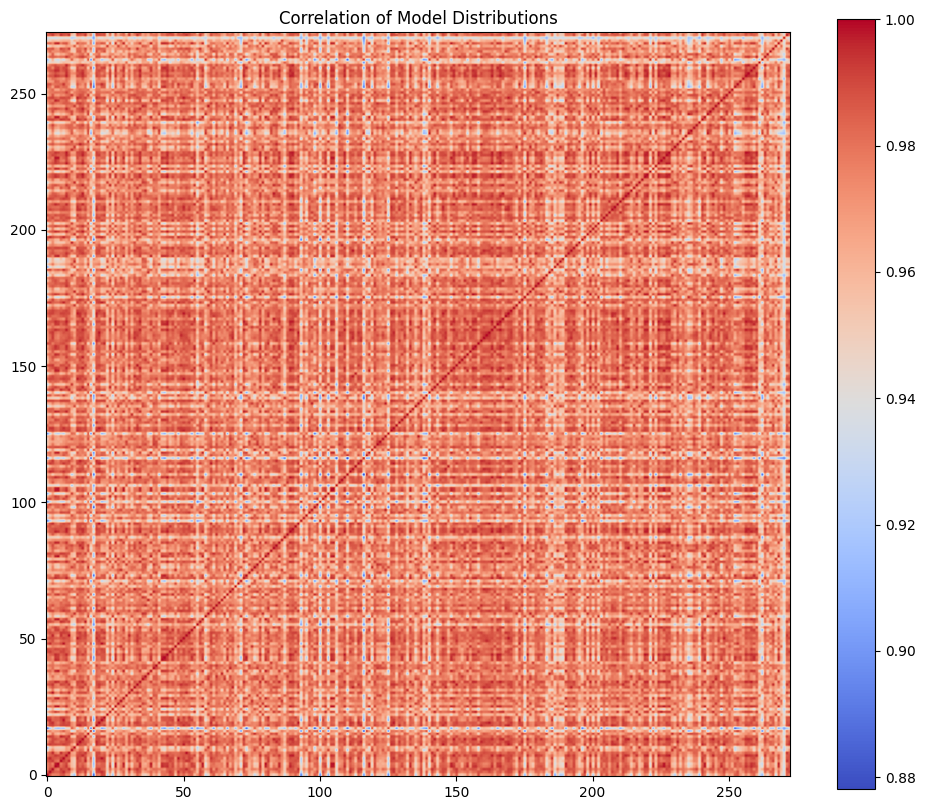

In [19]:
#Each row of m represents a variable
#each column a single observation of all those variables.
#treat each model as a variable
cov1 = np.cov(df[cols].T)
cor1 = np.corrcoef(df[cols].T)

x = cov1

fig = plt.subplots(figsize = (12,10))
plt.imshow(
    x,cmap = 'coolwarm',vmin=np.min(x),vmax=np.max(x)
)
plt.gca().invert_yaxis()

plt.title('Covariance of Model Distributions')
plt.colorbar()

x = cor1

fig = plt.subplots(figsize = (12,10))
plt.imshow(
    x,cmap = 'coolwarm',vmin=np.min(x),vmax=np.max(x)
)
plt.gca().invert_yaxis()

plt.title('Correlation of Model Distributions')
plt.colorbar()

# #treat each glacier as a variable
# cov2 = np.cov(df[cols])
# cor2 = np.corrcoef(df[cols])
# x = cor2

# plt.figure(figsize=(12, 10))
# plt.imshow(
#     x, cmap = 'coolwarm',vmin=x.min(),vmax = x.max()
# )
# plt.title('Correlation of Thickness Distributions')
# plt.gca().invert_yaxis()

# plt.colorbar()
# x = cov2

# plt.figure(figsize=(12, 10))
# plt.imshow(
#     x, cmap = 'coolwarm',vmin=x.min(),vmax = x.max()
# )
# plt.gca().invert_yaxis()

# plt.title('Covariance of Thickness Distributions')

# plt.colorbar()

Text(0, 0.5, 'Left-Out-Thickness Model Estimate')

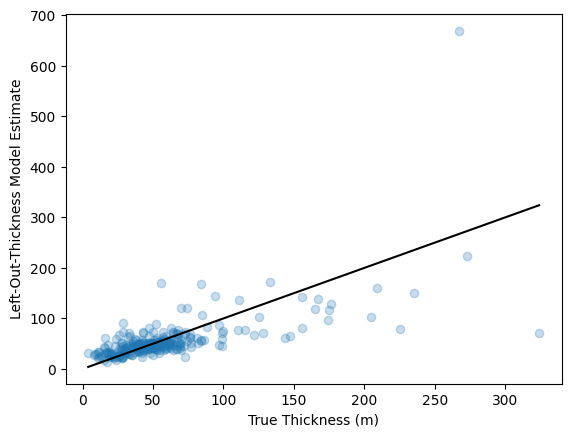

In [21]:
#### Left-Out-Thickness Model Estimates ####
mods = pd.DataFrame(columns = ['LOO','True'])
mods['LOO'] = pd.Series(np.diag(train[cols]))
mods['True'] = (train['Thickness'].reset_index().drop('index', axis = 1))

x = mods['True']
y = mods['LOO']
plt.scatter(
    x,y,alpha = 0.25
)
plt.plot(
    (x.min(),x.max()),
    (x.min(),x.max()),
    'k-'
)
plt.xlabel('True Thickness (m)')
plt.ylabel('Left-Out-Thickness Model Estimate')

Text(0, 0.5, 'Cross-Validated Thickness Estimate')

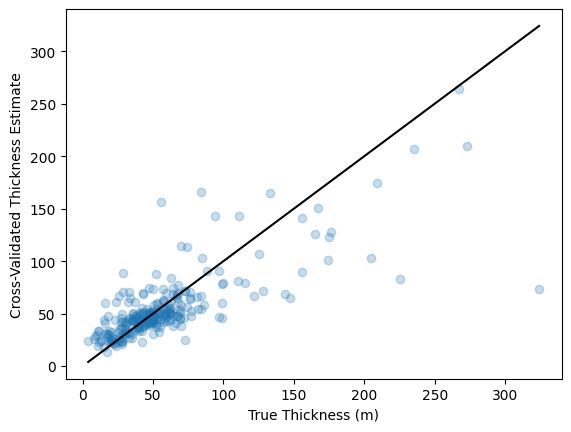

In [22]:
#### Left-Out-Thickness Model Estimates ####
mods = pd.DataFrame(columns = ['LOO','True'])
mods['LOO'] = pd.Series(np.mean(train[cols],axis = 1))
mods['True'] = (train['Thickness'])
x = mods['True']
y = mods['LOO']
plt.scatter(
    x,y,alpha = 0.25
)
plt.plot(
    (x.min(),x.max()),
    (x.min(),x.max()),
    'k-'
)
plt.xlabel('True Thickness (m)')
plt.ylabel('Cross-Validated Thickness Estimate')

In [23]:
mods[mods['True'] == mods['True'].max()]

,LOO,True
105,73.256409,324.0


In [24]:
#### Calculate 95% confidence intervals ####
X = np.mean(df[cols], axis = 1)
se = np.std(df[cols], axis = 1) / np.sqrt(len(cols))

df['LCI'] = X - (1.96 * se)
df['UCI'] = X + (1.96 * se)

lb = df['LCI'] / 1e3 * df['Area'] / 1e3
ub = df['UCI'] / 1e3 * df['Area'] / 1e3

In [25]:
# Calculate 95% confidence intervals ####
X = np.mean(train[cols], axis = 1)
se = np.std(train[cols], axis = 1) / np.sqrt(len(cols))

train['LCI'] = X - (1.96 * se)
train['UCI'] = X + (1.96 * se)

lb = train['LCI'] / 1e3 * train['Area'] / 1e3
ub = train['UCI'] / 1e3 * train['Area'] / 1e3

/tmp/ipykernel_3567847/148725749.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['LCI'] = X - (1.96 * se)
/tmp/ipykernel_3567847/148725749.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['UCI'] = X + (1.96 * se)


Text(0.5, 1.0, 'Leave-One-Out X-val 95% CI')

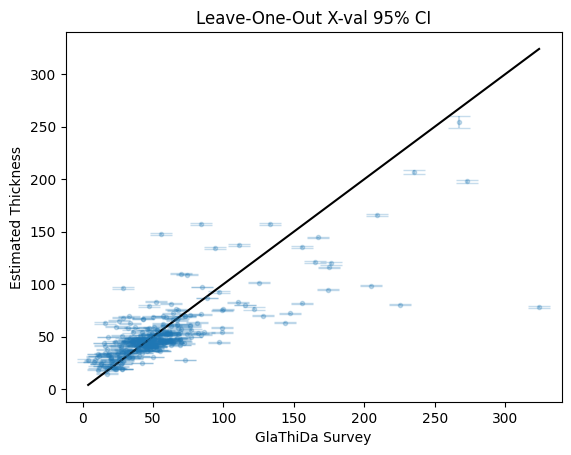

In [26]:
x = train['Thickness']
# y = np.mean(dfci, axis = 1)
# y = df['we']
y = np.mean(train[cols],axis = 1)
plt.errorbar(
    x,y,yerr = train['UCI'] - train['LCI'],
        alpha = 0.25,
#     label = 'Estimates $\hat{\mu}(x)$',
    linestyle = 'None',
    marker = '.',
    capsize = 8,
    color = '#1f77b4',
)

plt.plot(
    (x.min(),x.max()),
    (x.min(),x.max()),
    '-k'
)

plt.ylabel('Estimated Thickness')
plt.xlabel('GlaThiDa Survey')
plt.title('Leave-One-Out X-val 95% CI')
# plt.xscale('log')
# plt.yscale('log')

In [ ]:
df[df['Thickness'] == 267]

In [ ]:
#### Calculate 95% confidence intervals ####
X = np.mean(df[cols], axis = 1)
se = np.std(df[cols], axis = 1) / np.sqrt(len(cols))

df['LCI'] = X - (1.96 * se)
df['UCI'] = X + (1.96 * se)

lb = df['LCI'] / 1e3 * df['Area'] / 1e3
ub = df['UCI'] / 1e3 * df['Area'] / 1e3

x = df['Thickness']
# y = np.mean(dfci, axis = 1)
# y = df['we']
y = np.mean(df[cols],axis = 1)
plt.errorbar(
    x,y,yerr = df['UCI'] - df['LCI'],
        alpha = 0.25,
#     label = 'Estimates $\hat{\mu}(x)$',
    linestyle = 'None',
    marker = '.',
    capsize = 8,
    color = '#1f77b4',
)

plt.plot(
    (x.min(),x.max()),
    (x.min(),x.max()),
    '-k'
)

plt.ylabel('Estimated Thickness')
plt.xlabel('GlaThiDa Survey')
plt.title('Leave-One-Out X-val 95% CI')
# plt.xscale('log')
# plt.yscale('log')

Text(0, 0.5, 'Estimates By Model Trained W/O RGI60-01.00112 (m)')

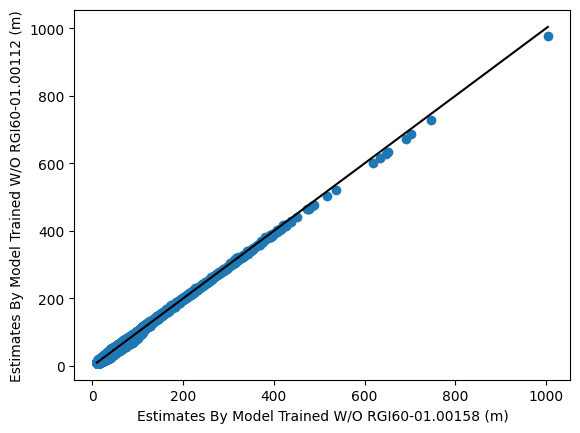

In [26]:
x = df[cols].T.loc[157]
y = df[cols].T.loc[111]
plt.plot(x,y,'o')
plt.plot(
    (x.min(),x.max()),
    (x.min(),x.max()),
    'k-'
)
A = df['RGIId'].T.loc[157]
B = df['RGIId'].T.loc[111]
# plt.title(f'Estimates of Model With Left Out {A} vs Left Out {B}')
plt.xlabel(f'Estimates By Model Trained W/O {A} (m)')
plt.ylabel(f'Estimates By Model Trained W/O {B} (m)')

In [ ]:
conditions = [cor2 > 0]
def glac_finder(conditions):

    where = np.where(conditions)
    a = where[1]
    b = where[2]

    t = np.zeros(shape=(len(a), 2))

    combs = [[]]
    for i in tqdm(range(len(a))):
        x = a[i]
        y = b[i]
        if [x,y] in combs:
            continue
        z = np.array([x,y])
        t[i] = z   
        combs.append([y,x])
    t = t[np.where(t[:,0] != t[:,1])]
    return t

def find_diffs(t,obj):
    feat_list = ['Correlation','Distance','Area','Lmax','Slope','Zmin','index1','index2']
    diffs = np.empty(shape = (0,len(feat_list)))
    for i in tqdm(range(len(t))):
        j = int(t[i][0])
        k = int(t[i][1])

        x = df.iloc[j]
        y = df.iloc[k]
        z = np.empty(shape = (len(feat_list),))

        for l,feat in enumerate(feat_list):
            if feat == 'Correlation':
                z[l] = obj[int(t[i][0]),int(t[i][1])]
            if feat == 'Distance':
                z[l] = geopy.distance.geodesic(
                    (x['CenLat'],x['CenLon']),
                    (y['CenLat'],y['CenLon'])
                ).kilometers
            if feat == 'index1':
                z[l] = j
            if feat == 'index2':
                z[l] = k
            if (feat != 'Correlation' and 
                feat != 'Distance' and 
                feat != 'index1' and 
                feat != 'index2'):
                z[l] = abs(x[feat] - y[feat])
        z = np.expand_dims(z,0)
        diffs = np.concatenate((diffs,z),axis = 0)

    diffs = pd.DataFrame(diffs)

    diffs = diffs.rename(columns = {
        0:'Correlation',1:'Distance (km)',2:'Area',
        3:'Lmax',4:'Slope',5:'Zmin',6:'index1',7:'index2'
    })
    diffs = diffs.sort_values('Correlation')
    return diffs

In [ ]:
conditions = [cor1 < 0.95]
t = glac_finder(conditions)
i = np.random.randint(0, len(t))

j = int(t[i][0])
k = int(t[i][1])

x = df[cols].T.iloc[j]
y = df[cols].T.iloc[k]
z = df[cols].index
plt.scatter(x,y,c = z,alpha = 0.5)

# model = np.poly1d(np.polyfit(x, y, 1))
# plt.plot(x,model(x),'-r')
plt.xlabel('Left Out Glacier:' + df['RGIId'].iloc[j] + 
          '\nLeft Out Thickness = ' + str(df['Thickness'].iloc[j]) +
          '\nLeft Out Area = ' + str(df['Area'].iloc[j]))
plt.ylabel('Left Out Glacier ' + df['RGIId'].iloc[k] + 
           '\nLeft Out Thickness = ' + str(df['Thickness'].iloc[k]) +
           '\nLeft Out Area = ' + str(df['Area'].iloc[k]))
plt.colorbar(label = 'Left Out Thickness Model Index')
plt.plot(
    (x.mean(),x.mean()),
    (y.min(),y.max()),
    '--k'
)
plt.plot(
    (x.min(),x.max()),
    (y.mean(),y.mean()),
    '--k'
    
)
# plt.axis('square')

In [ ]:
obj = cov1
conditions = [obj > 1045]
t = glac_finder(conditions)
diffs1 = find_diffs(t,obj)

conditions = [obj < 1045]
t = glac_finder(conditions)
diffs2 = find_diffs(t,obj)

feat_list = list(diffs1)

for feat in feat_list:
    plt.scatter(
        diffs1[feat], diffs1['Correlation'], 
        alpha = 0.25,color = 'blue',
        label = 'Corr > 0'
    )
    plt.scatter(
        diffs2[feat],diffs2['Correlation'],
        alpha = 0.25,color = 'orange',
        label = 'Corr < 0'
    )
    if feat == 'Area' or feat == 'Lmax':
        plt.xscale('log')
    plt.xlabel(feat)
    plt.ylabel('Covariance')
    plt.show()

In [ ]:
obj = cor1
conditions = [obj > 0.94]
t = glac_finder(conditions)
diffs1 = find_diffs(t,obj)

conditions = [obj < 0.94]
t = glac_finder(conditions)
diffs2 = find_diffs(t,obj)

feat_list = list(diffs1)

for feat in feat_list:
    plt.scatter(
        diffs1[feat], diffs1['Correlation'], 
        alpha = 0.25,color = 'blue',
        label = 'Corr > 0'
    )
    plt.scatter(
        diffs2[feat],diffs2['Correlation'],
        alpha = 0.25,color = 'orange',
        label = 'Corr < 0'
    )
    if feat == 'Area' or feat == 'Lmax':
        plt.xscale('log')
    plt.xlabel(feat)
    plt.ylabel('Correlation')
    plt.show()

In [ ]:
from scipy.sparse.linalg import eigs

In [ ]:
L,Q=eigs(cov2,10)

In [ ]:
Q

In [ ]:
print(L/sum(L))

plt.hist((Q[:,0]),20)
plt.yscale('log')



In [ ]:
sum(np.abs(Q[:,0]) > 0.01)/340

In [ ]:
plt.imshow(cor1,vmin=np.min(cor1),vmax=np.max(cor1),cmap='coolwarm')
plt.xlim([240,273])
plt.ylim([240,273])

In [ ]:
j = np.random.randint(0, 199)
# j = 157
x = df[j]
i = np.random.randint(0, 199)
# i = 57
y = df[i]
plt.scatter(x,y,alpha = 0.25)
# plt.plot(
#     (10,300),
#     (10,300),
#     'k-'
# )

model = np.poly1d(np.polyfit(x, y, 1))


# plt.axis('square')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Estimates by Model ' + str(j))
plt.ylabel('Estimates by Model ' + str(i))
plt.grid()
plt.plot(x,model(x),'-r')
plt.show()

# plt.imshow(cov2,cmap = 'coolwarm',vmin =np.min(cov2), vmax = np.max(cov2))

In [ ]:
plt.plot((df[cols].iloc[i]),'o')
plt.title('Thickness Estimates of Glacier ' + str(i))
plt.xlabel('Index of Left-Out-Thickness Model Estimate')
plt.ylabel('Estimated Thickness')
plt.plot(
    (0,df.index.sort_values()[-1]),
    (np.mean(df[cols].iloc[i]), np.mean(df[cols].iloc[i])),
    '-k'
)

# plt.plot(
#     (0,340),
#     (df['Thickness'].iloc[i], df['Thickness'].iloc[i]),
#     '-.k'
# )

plt.show()
plt.plot((df[cols].iloc[j]),'o')
plt.title('Thickness Estimates of Glacier ' + str(j))
plt.xlabel('Index of Left-Out-Thickness Model Estimate')
plt.plot(
    (0,df.index.sort_values()[-1]),
    (np.mean(df[cols].iloc[j]), np.mean(df[cols].iloc[j])),
    '-k'
)
# plt.plot(
#     (0,340),
#     (df['Thickness'].iloc[j], df['Thickness'].iloc[j]),
#     '-.k'
# )
plt.ylabel('Estimated Thickness')
plt.show()

In [ ]:
# plt.plot(thickness_estimates[10,:],thickness_estimates[9,:],'o')
# plt.xlabel('Thickness estimates for Glacier A')
# plt.ylabel('Thickness estimates for Glacier B')
# plt.axis('square')

In [ ]:
np.mean(df[cols],axis = 1)

In [ ]:
x = df['Thickness']
y = np.mean(df[cols],axis = 1)
z = df['FMT']
plt.scatter(
    x,abs(y-x),alpha = 0.15,label = 'This Study Residual'
)
plt.scatter(
    x,abs(z-x),alpha = 0.15,label = 'Farinotti Residual'
)
plt.plot(
    (x.min(),x.max()),
    (0,0),'k--'
)
plt.xlabel('GlaThiDa Thickness (m)')
plt.ylabel('Residual (m)')
plt.legend()
plt.yscale('log')
# plt.xscale('log')
plt.show()

x = (df['Thickness'] / 1e3) * df['Area']
y = (np.mean(df[cols],axis = 1) / 1e3) * df['Area']
z = (df['FMT'] / 1e3) * df['Area']
plt.scatter(
    x,abs(y-x),alpha = 0.15,label = 'This Study Residual'
)
plt.scatter(
    x,abs(z-x),alpha = 0.15,label = 'Farinotti Residual'
)
plt.plot(
    (x.min(),x.max()),
    (0,0),'k--'
)
plt.xlabel('GlaThiDa Volume (km$^3$)')
plt.ylabel('Residual (km$^3$)')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [ ]:
np.mean(abs(y-x))

In [ ]:
np.std(abs(y-x))

In [ ]:
np.mean(abs(df['FMT']-x))

In [ ]:
np.std(abs(df['FMT']-x))

In [ ]:
df['res'] = y - df['Thickness'] 

df[abs(df['res']) >= 100]

In [ ]:
plt.hist(y-x,bins = 25,log = True)

In [ ]:
plt.scatter(
    df.index, df['res']
)
# plt.xscale('log')

In [ ]:
feat_list = ['CenLat', 'CenLon','Slope','Zmin','Zmed','Zmax','Area','Lmax','Thickness']

for feature in feat_list:
    plt.scatter(
        df.index,
        df[feature]
    )
    plt.xlabel('Index')
    plt.ylabel(feature)
    if feature == 'Area' or feature == 'Lmax':
        plt.yscale('log')
    plt.show()



In [ ]:
cov = pd.DataFrame(cov1)
# cor = pd.DataFrame(cor)

# bad_indexes = cov[cov[cols] == 0].dropna(axis = 0).index
# cov_d = cov.drop(bad_indexes)
# cor_d = cor.drop(bad_indexes)

# cov_d = cov_d.reset_index().drop('index',axis = 1)
# cor_d = cor_d.reset_index().drop('index',axis = 1)

# dftr = dft.drop(bad_indexes)
# dftr = dftr.reset_index().drop('index',axis = 1)

# dfpd = df[cols].T.copy()
# dfpd = dfpd.drop(bad_indexes)
# dfpd = dfpd.reset_index().drop('index', axis = 1)

In [ ]:
# identify columns that have one estimate for all glaciers.
bad_models = df[cols].T[df.T.duplicated()].index
bad_models

In [ ]:
cols = list(filter(lambda a: a not in bad_models.to_list(), cols))
df = df.drop(bad_models)

In [ ]:
n = 0
p = plt.get_cmap('seismic')
for i in tqdm(
    df.index,
):
    x = df[cols].T.loc[i]
    z = normx(x,norm)
    x_eval = np.linspace(z.min(),z.max(),500)

    kde = st.gaussian_kde(np.array(z))
    plt.plot(
        x_eval, kde(x_eval), '-',alpha = 0.15,
        c = p(n/(len(df) - 1))
    )
    n = n + 1
x = df['FMT']
z = normx(x,norm)
x_eval = np.linspace(z.min(),z.max(),500)
kde = st.gaussian_kde(np.array(z))
plt.plot(
    x_eval, kde(x_eval), '-',alpha = 1,
    c = 'orange'
)
plt.grid()

# plt.xscale('symlog')
plt.ylabel('Likelihood')
if norm == True:
    plt.xlabel('Normalized Estimated Thickness')
if norm == False:
    plt.xlabel('Estimated Thickness')
# plt.xscale('log')
# plt.title('Leave-One-Out Thickness PDF  -- sorted by ' + feat + ' ' +  order)
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(
    ax_cb, cmap=p, orientation='vertical',
    ticklocation = 'auto',ticks = [],
    label = 'Left-Out Index'
)
cb1.set_ticks(ticks = (0,1),labels = ['Min','Max'])
# cb1.set_label('Thickness',x = -0.07)
plt.gcf().add_axes(ax_cb)
#     plt.show()


In [ ]:
# check the mean estimate.

x = np.mean(df[cols],axis = 1)
z = normx(x,norm)
x_eval = np.linspace(z.min(),z.max(),500)
kde = st.gaussian_kde(np.array(z))
plt.plot(
    x_eval, kde(x_eval), '-',alpha = 1,
    c = 'blue',label = 'Mean LOO estimate'
)


x = df['Thickness']
z = normx(x,norm)
x_eval = np.linspace(z.min(),z.max(),500)
kde = st.gaussian_kde(np.array(z))
plt.plot(
    x_eval, kde(x_eval), '-',alpha = 1,
    c = 'orange',label = 'GlaThiDa Thickness'
)

# x = df['FMT']
# z = normx(x,norm)
# x_eval = np.linspace(z.min(),z.max(),500)
# kde = st.gaussian_kde(np.array(z))
# plt.plot(
#     x_eval, kde(x_eval), '-',alpha = 1,
#     c = 'red',label = 'Farinotti Thickness'
# )
plt.grid()
plt.legend()
# plt.title('Leave-One-Out Mean Thickness PDF -- sorted by ' + feat + ' ' +  order)

# plt.xscale('symlog')
plt.ylabel('Likelihood')
if norm == True:
    plt.xlabel('Normalized Estimated Thickness')
if norm == False:
    plt.xlabel('Estimated Thickness')
# plt.title('Leave-One-Out Thickness PDF')
# divider = make_axes_locatable(plt.gca())
# ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
# cb1 = mpl.colorbar.ColorbarBase(
#     ax_cb, cmap=p, orientation='vertical',
#     ticklocation = 'auto',ticks = [],
#     label = 'Left-Out Thickness'
# )
# cb1.set_ticks(ticks = (0,1),labels = ['Min','Max'])
# cb1.set_label('Thickness',x = -0.07)
# plt.gcf().add_axes(ax_cb)

#     plt.show()
# plt.xscale('log')

In [ ]:
x = df['Thickness']
y = np.mean(df[cols],axis = 1)
z = df['FMT'] 
plt.scatter(
    x,y,alpha = 0.25,label = 'This Study Volume'
)
plt.scatter(
    x,z,alpha = 0.25,label = 'Farinotti Volume'
)
plt.plot(
    (x.min(),x.max()),
    (x.min(),x.max()),
    c = 'orange'    
)
plt.legend()
plt.xlabel('GlaThiDa Volume')
plt.ylabel('Estimated Volume')
# plt.xscale('log')
# plt.yscale('log')

In [ ]:
p = plt.get_cmap('seismic')
n = 0
for i in tqdm(
    df.index,
#     dftr.sort_values('Thickness',ascending = True).reset_index().index
):
#     print(dft['Thickness'].loc[i])

    
    x =cov.loc[i] 
    z = normx(x,norm)

    x_eval = np.linspace(z.min(),z.max(),500)

    kde = st.gaussian_kde(np.array(z))
    plt.plot(
        x_eval, kde(x_eval), '-',alpha = 0.5,
        c = p(n/(len(df)))
    )
    n = n + 1
#     c = p(n/(len(pos) - 1))
# plt.ylim(0,0.2)
# plt.yscale('log')
# plt.xscale('symlog')
plt.ylabel('Density')
if norm == True:
    plt.xlabel('Normalized Covariance')
if norm == False:
    plt.xlabel('Covariance')
# plt.title('Leave-One-Out Covariance PDF -- sorted by ' + feat + ' ' +  order )
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(
    ax_cb, cmap=p, orientation='vertical',
    ticklocation = 'auto',ticks = [],
    label = 'Left-Out Index'
)
cb1.set_ticks(ticks = (0,1),labels = ['Min','Max'])
# cb1.set_label('Thickness',x = -0.07)
plt.gcf().add_axes(ax_cb)

#     plt.show()
